### Part 1:MNIST Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
%matplotlib inline

In [9]:
data=pd.read_csv(r'C:\Users\Prince\Desktop\Upgrad\Backpropagation\MNIST\train.csv')
X_test = pd.read_csv(r'C:\Users\Prince\Desktop\Upgrad\Backpropagation\MNIST\test.csv')

In [10]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
data_x = data.copy()
data_y = data_x.pop('label')

In [12]:
data_x.head(2)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
data_y.head(2)

0    1
1    0
Name: label, dtype: int64

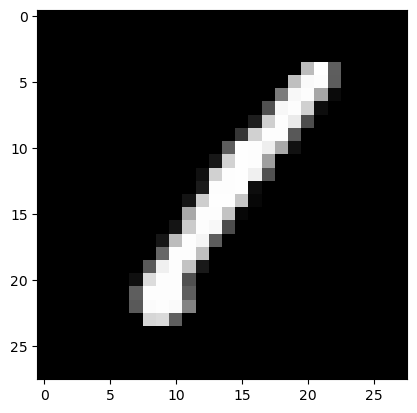

In [18]:
img = data_x.iloc[0].values.reshape((28,28))
plt.imshow(img,cmap='gray')

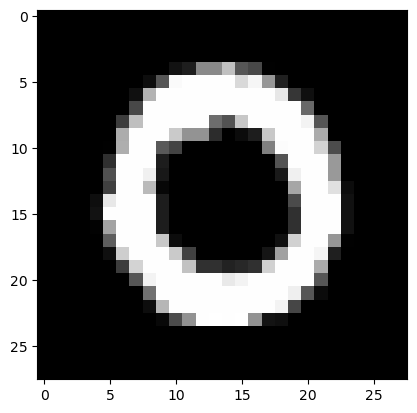

In [20]:
img = data_x.iloc[1].values.reshape((28,28))
plt.imshow(img,cmap='gray')

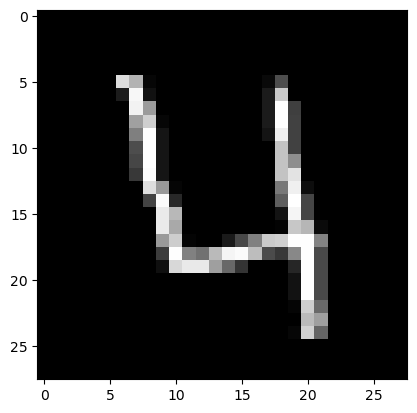

In [21]:
img = data_x.iloc[3].values.reshape((28,28))
plt.imshow(img,cmap='gray')

In [22]:
set(data_y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

### Part 2: Model Architecture

In [23]:
model = keras.Sequential([
    keras.layers.Dense(128, activation=tf.nn.relu, input_shape=(784,)),
    keras.layers.Dense(128,activation = tf.nn.relu),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation = tf.nn.softmax)
])

In [24]:
model.compile(optimizer ='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 134794 (526.54 KB)
Trainable params: 134794 (526.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Part 3:Model Training

In [25]:
## Splitting the dataset
X_train,X_val,y_train,y_val = train_test_split(data_x,data_y,test_size=0.1,random_state=42)

In [26]:
model.fit(X_train,y_train,batch_size=64,epochs=5,validation_data=(X_val,y_val))

Epoch 1/5


591/591 [==============================] - 7s 7ms/step - loss: 1.4706 - accuracy: 0.8487 - val_loss: 0.5751 - val_accuracy: 0.8840
Epoch 2/5
591/591 [==============================] - 4s 7ms/step - loss: 0.2942 - accuracy: 0.9268 - val_loss: 0.3279 - val_accuracy: 0.9195
Epoch 3/5
591/591 [==============================] - 4s 7ms/step - loss: 0.1926 - accuracy: 0.9481 - val_loss: 0.2722 - val_accuracy: 0.9381
Epoch 4/5
591/591 [==============================] - 4s 7ms/step - loss: 0.1522 - accuracy: 0.9577 - val_loss: 0.2459 - val_accuracy: 0.9393
Epoch 5/5
591/591 [==============================] - 4s 7ms/step - loss: 0.1364 - accuracy: 0.9612 - val_loss: 0.2319 - val_accuracy: 0.9426


### Part 4: Model Prediction

In [27]:
model.predict(X_test).argmax(axis=1)

875/875 [==============================] - 3s 4ms/step


array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

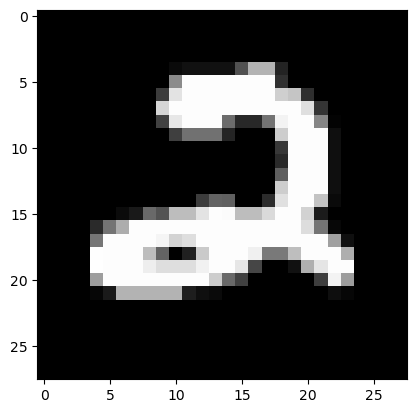

In [28]:
img = X_test.iloc[0].values.reshape((28,28))
plt.imshow(img,cmap='gray')

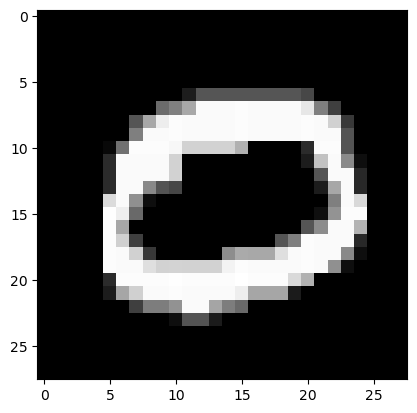

In [29]:
img = X_test.iloc[1].values.reshape((28,28))
plt.imshow(img,cmap='gray')